## LiDAR based programs: Angular Sweep Problem Variations
Name: Divya Natekar

Net ID: dyn2009

NYU ID: N19974330
### What does this program do?
This program also covers a similar LiDAR logic encountered in another program. In this program, I used angle-based binning techniques and distance checks, and retained only the nearest points in each direction, in prepartion for the azimuthal based filtering encountered in later problems.

#### i. Importing the required libraries:

In [1]:
# Import libraries for 3D LiDAR logic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#### ii. Loading and cleaning the 3-D point cloud from the reduced dataset:

In [2]:
# Load first 3D point cloud from reduced dataset
url = 'https://docs.google.com/spreadsheets/d/1io-mxKbNpP8YIhzwwsWFRvGTvry2Ao0j/export?format=csv&gid=836186177'
df = pd.read_csv(url)
df = df[['x', 'y', 'z']].copy()
df.columns = ['X', 'Y', 'Z']
df['X'] = pd.to_numeric(df['X'], errors='coerce')
df['Y'] = pd.to_numeric(df['Y'], errors='coerce')
df['Z'] = pd.to_numeric(df['Z'], errors='coerce')
df = df.dropna().reset_index(drop=True)


#### iii. Computing the spherical angles and distance:

In [3]:
# Compute spherical coordinates: azimuth, elevation, distance
df['Distance'] = np.sqrt(df['X']**2 + df['Y']**2 + df['Z']**2)

# Azimuth angle (longitude) in [0, 360)
df['Azimuth'] = np.degrees(np.arctan2(df['Y'], df['X'])) % 360

# Elevation angle (latitude) in [-90, 90]
df['Elevation'] = np.degrees(np.arcsin(df['Z'] / df['Distance']))


#### iv. Bin into angular slices and keeping furthest point in each (Az, El) bin:

In [5]:
# Define bin step size (e.g., 5° resolution for azimuth and elevation)
az_step = 5
el_step = 5

# Remove rows with NaN or infinite elevation values
df = df[np.isfinite(df['Elevation'])].copy()

# Bin the azimuth and elevation angles into integer bins
df['AzBin'] = (df['Azimuth'] // az_step).astype(int)
df['ElBin'] = (df['Elevation'] // el_step).astype(int)

# For each (AzBin, ElBin) pair, keep only the furthest point
df_furthest = df.loc[df.groupby(['AzBin', 'ElBin'])['Distance'].idxmax()]


#### v. Visualising the sparse outer shell in 3-D space:

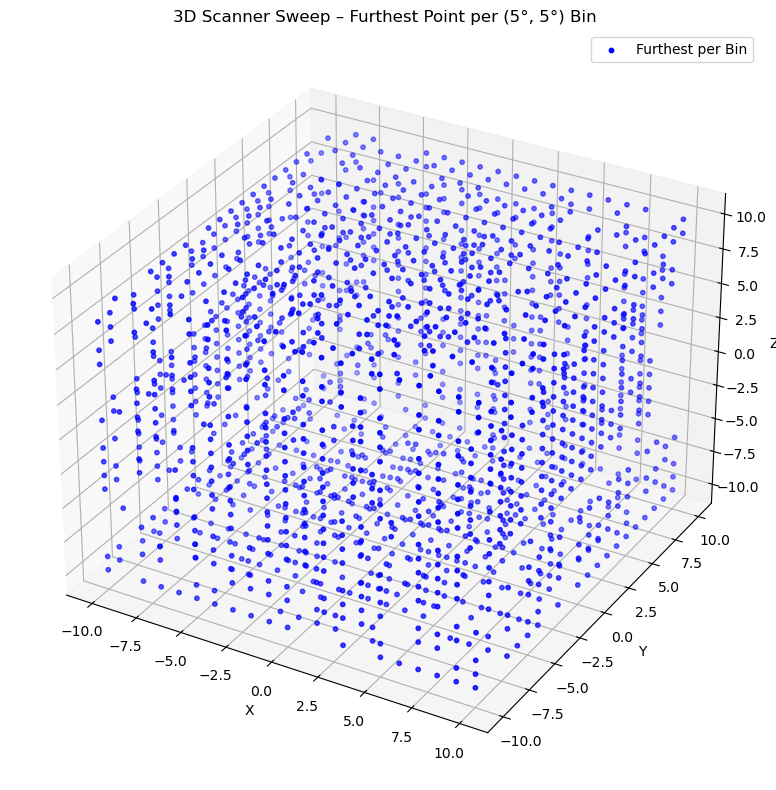

In [6]:
# Plot 3D point cloud after filtering
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_furthest['X'], df_furthest['Y'], df_furthest['Z'],
           color='blue', s=10, label='Furthest per Bin')

ax.set_title(f"3D Scanner Sweep – Furthest Point per ({az_step}°, {el_step}°) Bin")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.legend()
plt.tight_layout()
plt.show()
